<a href="https://colab.research.google.com/github/justaplan/ehs_data_analysis/blob/master/EHS_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
from google.colab import auth
auth.authenticate_user()
import pandas as pd
import matplotlib.pyplot as plt
import gspread
from oauth2client.client import GoogleCredentials
import numpy as np

gc = gspread.authorize(GoogleCredentials.get_application_default())

wb = gc.open_by_key('1qvK5BkBSLDFKhausgwg8Ai3-3scVwJHGBrJ17fj48tc')
ws = wb.worksheet("Year Data")

# get_all_values gives a list of rows.
rows = ws.get_all_values()

# Convert to a DataFrame and render.
df = pd.DataFrame.from_records(rows[1:],columns=rows[0])
df["Incident Rate"] = df["Incident Rate"].astype(float)
df["Frequency Rate"] = df["Frequency Rate"].astype(float)
df["Severity Rate"] = df["Severity Rate"].astype(float)
df

,No,Year,Permanent & Contract,Trainee,Subcontractor,Total Man Hours Worked,OSHA Case,Non OSHA Case,Loss Day,Fatality Rate,Incident Rate,Frequency Rate,Severity Rate,National Incident Rate,National Fatality Rate
0,,2014,307,32,70,942336,4,0,10,0,9.78,4.24,10.61,3.1,4.23
1,,2015,348,70,75,1135872,4,0,2,0,8.11,3.52,1.76,2.81,4.75
2,,2016,389,47,98,1230336,5,0,12,0,9.36,4.06,9.75,2.88,4.86
3,,2017,439,42,135,1419264,5,1,12,0,8.12,3.52,8.46,2.93,4.92
4,,2018,499,65,146,1635840,10,11,13,0,14.08,6.11,7.95,2.4,4.14
5,,2019,591,66,134,1822464,1,6,3,0,1.26,0.55,1.65,2.71,3.83
6,,2020,591,66,134,1822464,1,6,3,0,1.26,0.55,1.65,2.71,3.83


In [39]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

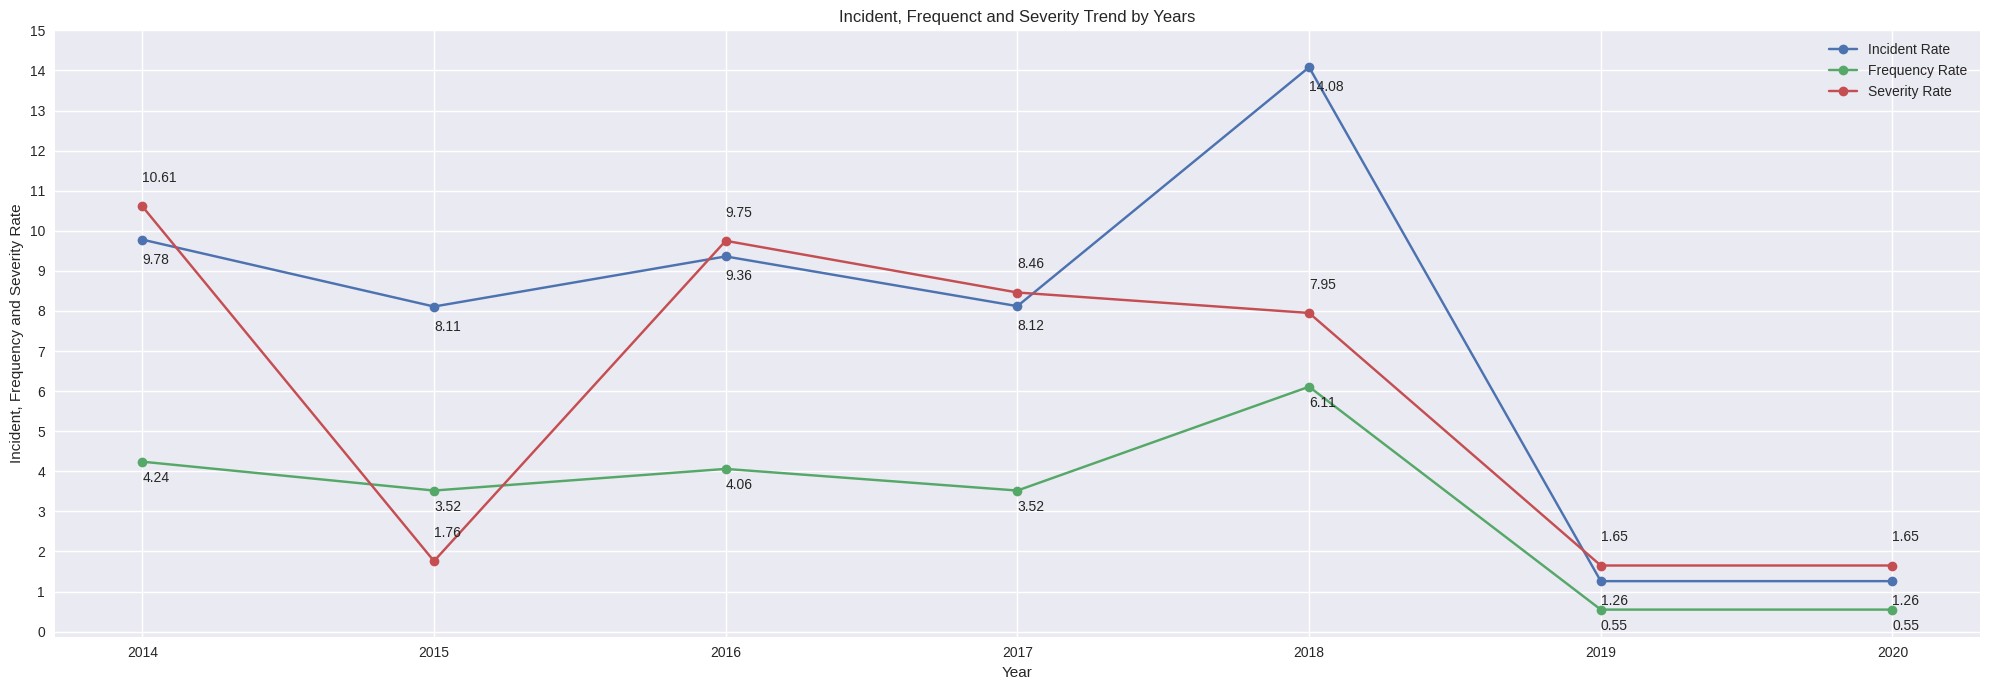

In [93]:
## custom function
def value_plotting(input1,input2,input3):
  for x,y in zip(input1,input2):
    plt.text(x,y + (input3),s=y)

## Chart Size and Style
plt.figure(figsize=(20,7),dpi=100)
plt.style.use("seaborn")

## Data Gathering
x = df["Year"]
y = df["Incident Rate"]
z = df["Frequency Rate"]
g = df["Severity Rate"]

x_indexes = np.arange(len(x))

## Chart Plotting
plt.plot(x_indexes,y, marker="o",label="Incident Rate")
plt.plot(x_indexes,z, marker="o",label="Frequency Rate")
plt.plot(x_indexes,g, marker="o",label="Severity Rate")

## Title and Labelling
plt.title("Incident, Frequenct and Severity Trend by Years")
plt.xlabel("Year")
plt.ylabel("Incident, Frequency and Severity Rate")
plt.xticks(x_indexes,x)
plt.yticks([y for y in range(0,16)])

## Value plotting in the chart
value_plotting(x_indexes,y,-0.6)
value_plotting(x_indexes,z,-0.5)
value_plotting(x_indexes,g,0.6)

plt.legend()
plt.tight_layout()
plt.show()